In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import json

import copy

with open('video_data.json', 'r') as fp:
    videoList = json.load(fp)
    videoData = pd.DataFrame(videoList) 

# we first convert csv file downloaded from Kaggle.com outside JupyterHub to Json. 
# This cell is to import Json files 


In [2]:
videoData.corr()
# We find correlations between critic count, scores, user count and all sales. 
# We find that critic score and sales have highest correlation comparing to other correlations besides sales to sales. 
# Since correlation among sales don't tell anything significant.


,Critic_Count,Critic_Score,EU_Sales,Global_Sales,JP_Sales,NA_Sales,User_Count
Critic_Count,1.000000,0.425504,0.277533,0.303571,0.180219,0.295413,0.362334
Critic_Score,0.425504,1.000000,0.220752,0.245471,0.152593,0.240755,0.264376
EU_Sales,0.277533,0.220752,1.000000,0.901239,0.435068,0.765336,0.283360
Global_Sales,0.303571,0.245471,0.901239,1.000000,0.612300,0.941010,0.265012
JP_Sales,0.180219,0.152593,0.435068,0.612300,1.000000,0.449598,0.075638
NA_Sales,0.295413,0.240755,0.765336,0.941010,0.449598,1.000000,0.246429
User_Count,0.362334,0.264376,0.283360,0.265012,0.075638,0.246429,1.000000


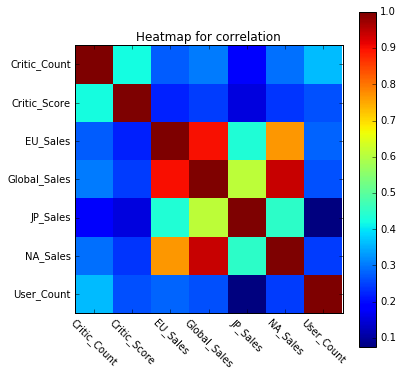

In [3]:
col_labels = [col.encode('utf8') for col in videoData.corr().columns]
plt.figure(figsize=(6,6))
plt.imshow(videoData.corr(),interpolation='none') 
plt.xticks(range(len(col_labels)), col_labels, rotation=-45)
plt.yticks(range(len(col_labels)), col_labels)
plt.colorbar()
plt.title('Heatmap for correlation')

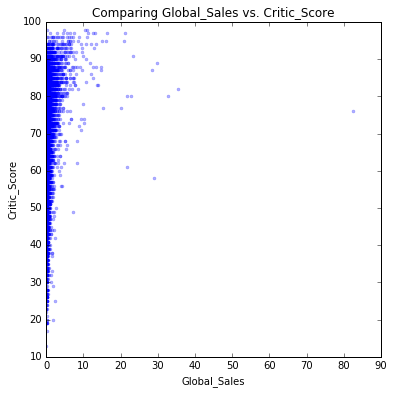

In [4]:
def video_scatter(data, x_cat, y_cat):
    plt.figure(figsize=(6,6))
    plt.plot(data[x_cat], videoData[y_cat], '.', alpha=0.3)
    plt.xlabel(x_cat)
    plt.ylabel(y_cat)
    plt.title('Comparing ' + x_cat + ' vs. ' + y_cat)

video_scatter(videoData, 'Global_Sales', 'Critic_Score')

Linear model: LinregressResult(slope=1.883306321887013, intercept=67.670014023743704, rvalue=0.2454706775067533, pvalue=5.9236148990064393e-112, stderr=0.082460768695402642)
R^2 = 0.0602558535156
p-value= 5.923614899e-112


(0, 20)

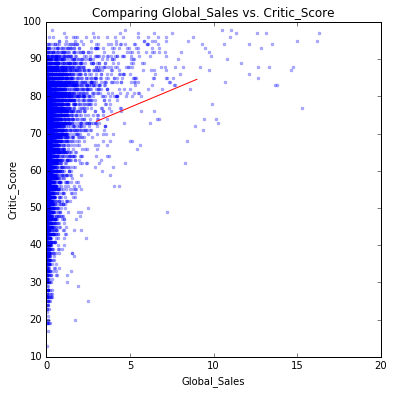

In [5]:
good_idx = ~videoData.Global_Sales.isnull() & ~videoData.Critic_Score.isnull()

X=videoData[good_idx].Global_Sales
Y=videoData[good_idx].Critic_Score 

lin_fit = stats.linregress(X, Y)
rho, pvalue = stats.pearsonr(X, Y)

R2 = lin_fit.rvalue**2
print 'Linear model:', lin_fit
print 'R^2 =', R2
print 'p-value=', pvalue

video_scatter(videoData, 'Global_Sales', 'Critic_Score')
xs=[3.0, 9.0]
ys= [ lin_fit[0] * xs[0] + lin_fit[1], lin_fit[0] * xs[1] + lin_fit[1] ]
plt.plot(xs,ys,'r', label='linear fit')
plt.xlim((0, 20))

# Here we drew a scatter plot comparing Global sales with critic scores and change it into suitable scale.
# Then we draw a linear regression line and find out slope and p-value(super small p-value)

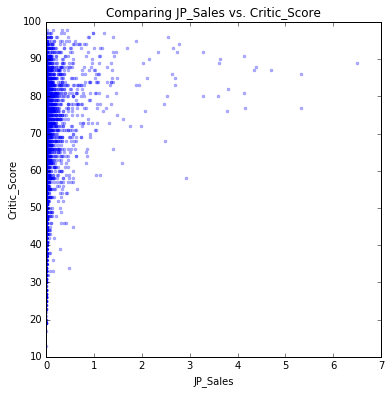

In [6]:
video_scatter(videoData, 'JP_Sales', 'Critic_Score')

Linear model: LinregressResult(slope=8.0236478982041763, intercept=68.526156005542589, rvalue=0.15259333475971482, pvalue=1.3875797230668842e-43, stderr=0.57615788420953973)
R^2 = 0.0232847258131
p-value= 1.38757972307e-43


(20, 100)

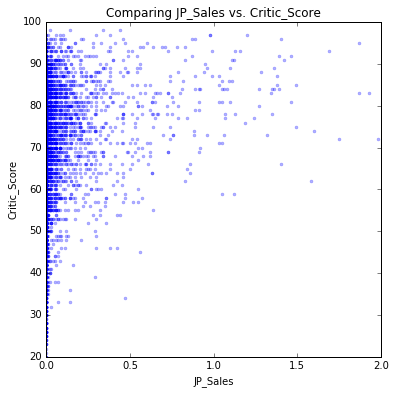

In [7]:
good_idx = ~videoData.JP_Sales.isnull() & ~videoData.Critic_Score.isnull()

X=videoData[good_idx].JP_Sales
Y=videoData[good_idx].Critic_Score 

lin_fit = stats.linregress(X, Y)
rho, pvalue = stats.pearsonr(X, Y)

R2 = lin_fit.rvalue**2
print 'Linear model:', lin_fit
print 'R^2 =', R2
print 'p-value=', pvalue

video_scatter(videoData, 'JP_Sales', 'Critic_Score')
xs=[3.0, 9.0]
ys= [ lin_fit[0] * xs[0] + lin_fit[1], lin_fit[0] * xs[1] + lin_fit[1] ]
plt.plot(xs,ys,'r', label='linear fit')
plt.xlim((0, 2))
plt.ylim((20, 100))
# We are doing same thing as last one, but comparing JP_Sales to critic scores this time. 
# This correlation is weaker than last one and higher p-value. 
# It is probably because critic scores are opinions mostly from Americans, and American has different standard than Japanese
# for judgement of a good game. 